# Comparison

In [1]:
using FileIO;
using Plots;
using DSP;

In [2]:
function H(x, window_size = 1024, overlap = 512)
    S = stft(x, window_size, overlap, window = hamming(window_size));
    return(abs.(S),angle.(S));
end;
db(x) = 10.0 .* log10.(x);

In [3]:
x1, fs = load("recordings/natural.flac"); x1 = x1[:];
x2, fs = load("recordings/2hr_2.flac"); x2 = x2[:];
m1,∠1 = H(x1); m1 = m1[:,75:575]
m2,∠2 = H(x2); m2 = m2[:,200:700]
t1 = 512.0 .* (1:size(m1,2)) ./ fs;
t2 = 512.0 .* (1:size(m2,2)) ./ fs;
f = range(0,fs/2,513);

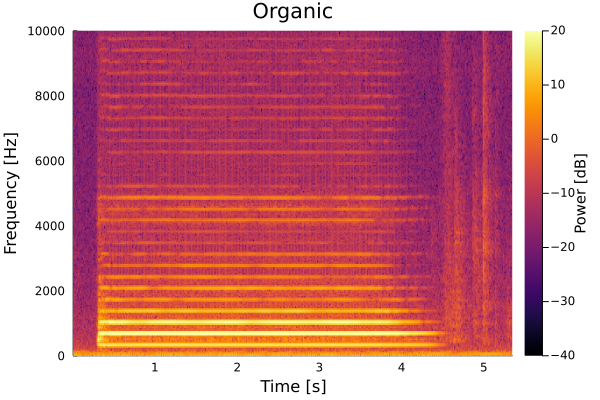

In [4]:
heatmap(t1,f,db(m1),
        ylims=(0,10000), clims=(-40,20),
        ylab="Frequency [Hz]",
        xlab="Time [s]",
        colorbar_title="Power [dB]",
        title="Organic"
)

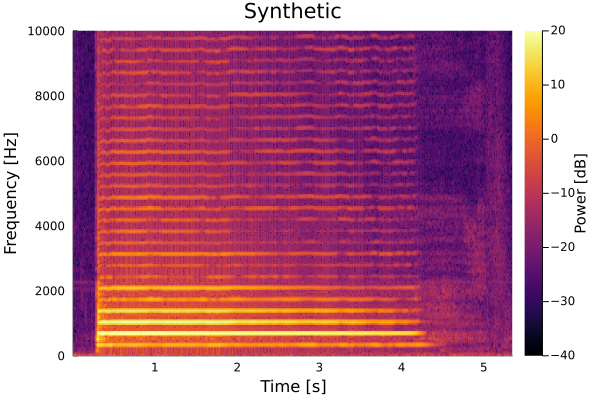

In [5]:
heatmap(t2,f,db(m2),
        ylims=(0,10000), clims=(-40,20),
        ylab="Frequency [Hz]",
        xlab="Time [s]",
        colorbar_title="Power [dB]",
        title="Synthetic"
)